## Import Packages, Set Paths Dynamically

In [56]:
import geopandas as gpd
import osmnx as ox
import folium
from shapely.geometry import box, Polygon, Point
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# get path to project root directory
project_root = Path.cwd().parents[0]

# build path to yaml config file
config_path = project_root/"configs"/"paths.yaml"

In [7]:
# load yaml file into a python dictionary called paths
with open(config_path) as f:
    paths = yaml.safe_load(f)

paths

{'data': {'external': 'data/external',
  'raw': 'data/raw',
  'processed': 'data/processed',
  'results': 'results'},
 'outputs': {'dynamic_maps': 'outputs/maps/dynamic',
  'static_maps': 'output/maps/static',
  'figures': 'output/figures',
  'tables': 'outputs/tables'}}

In [11]:
# build data directory using paths from yaml config
data_dir = project_root/paths['data']['processed']


# finally build path to our geojson file
settlements_path = data_dir / "UNHCR_poc_boundaries-Uganda_attributed_deduped.geojson"

In [12]:
# build path to output directory for processed grid data
grid_dir = project_root/paths['data']['processed']

# build path to output directory for maps
maps_dir = project_root/paths['outputs']['dynamic_maps']

## Plot Nakivale Settlement, Bounding Box

In [25]:
settlements = gpd.read_file(settlements_path).to_crs(crs = 32636)
settlements

,id,name,objectid,pcode,iso3,name_2,name_alt,loc_type,loc_subtype,createdate,...,source,unhcr_assist,footnote,comments,status,globalid,lat,lon,date_str,geometry
0,0,Palabek,27594.0,UGAs032271,UGA,Palabek RC,None,37.0,None,1.541376e+12,...,UNHCR,1.0,None,None,1.0,{9611730D-6DCD-4DBC-BF0F-C4156A5FA034},3.363550,32.415010,2018-11-04,"POLYGON ((451961.635 371230.291, 451957.294 37..."
1,1,Rhino,26820.0,UGAs032256,UGA,Omugo RC,None,37.0,***,1.524182e+12,...,UNHCR,1.0,RE-2013-SSD,Rhino Extention,1.0,{FE7358D3-BC57-4CB4-B23E-FA9628F92130},3.180525,31.178464,2018-04-19,"POLYGON ((296982.034 349810.434, 296973.898 34..."
2,2,Imvepi,168.0,UGAs990098,UGA,Imvepi RC,None,37.0,***,1.490746e+12,...,UNHCR,NaN,None,Reception centre,1.0,{B5ABBC96-47FA-442D-9CC6-2A1BB7124BEF},3.253135,31.277129,2017-03-28,"POLYGON ((302755.275 357465.263, 302626.34 357..."
3,3,Bidibidi,21261.0,UGAs027216,UGA,Bidibidi,None,35.0,***,1.476144e+12,...,UNHCR,NaN,,Northern UGA,1.0,{E925BA28-6E85-4E79-AA35-A5713AE76960},3.440858,31.386517,2016-10-10,"POLYGON ((317116.966 395596.912, 315637.754 39..."
4,4,Pagrinya,20314.0,UGAs004684,UGA,Pagrinya,None,35.0,***,1.472170e+12,...,UNHCR,1.0,None,Northern UGA,1.0,{FFF34AD8-C4B5-4450-9768-05C34E90A2B9},3.379000,32.009250,2016-08-25,"POLYGON ((390511.927 372479.037, 390523.356 37..."
5,5,Mungula I,12606.0,UGAs004680,UGA,Mungula,None,35.0,***,1.431994e+12,...,UNHCR,NaN,RE-2013-SSD,Northern UGA,1.0,{83A3CD4D-9C6A-4A75-AFD3-C91E9637D6B1},3.192977,31.788150,2015-05-18,"POLYGON ((366175.479 352743.212, 366230.371 35..."
6,6,Ayilo 1,3441.0,UGAs004662,UGA,Ayilo 1,None,35.0,***,1.401667e+12,...,UNHCR,1.0,RE-2013-SSD,Northern UGA,1.0,{FD926792-2F62-48EE-8150-21AB071AAF91},3.296111,31.934722,2014-06-01,"MULTIPOLYGON (((381316.251 365396.781, 381246...."
7,7,Ayilo 2,4758.0,UGAs004661,UGA,Ayilo 2,None,35.0,***,1.401667e+12,...,UNHCR,1.0,RE-2013-SSD,Northern UGA,1.0,{74E1BDBF-7BCD-4016-9A8E-D3790060F542},3.256600,31.962333,2014-06-01,"POLYGON ((382562.217 360679.927, 382876.264 36..."
8,8,Nyumanzi,3515.0,UGAs004664,UGA,Nyumanzi,None,35.0,***,1.401667e+12,...,UNHCR,1.0,RE-2013-SSD,Northern UGA,1.0,{211C8C6C-1CDF-49A7-9F7A-1027182F3BA6},3.456667,31.946944,2014-06-01,"POLYGON ((383038.427 382116.404, 383074.939 38..."
9,9,Boroli,3475.0,UGAs004663,UGA,Boroli Settlement,None,35.0,***,1.401667e+12,...,UNHCR,1.0,RE-2013-SSD,Northern UGA,1.0,{52C6351D-3E8E-4576-823D-DE3FC023B019},3.299444,31.866389,2014-06-01,"MULTIPOLYGON (((374793.794 364159.776, 374937...."


In [ ]:
# subset out nakivale settlement 
nakivale = settlements[settlements['name'].str.lower() == 'nakivale']

In [ ]:
# get bounding box vertices
minx, miny, maxx, maxy = nakivale.total_bounds

# build bounding box geodataframe
bbox = box(minx, miny, maxx, maxy)
bbox_gdf = gpd.GeoDataFrame(['nakivale'], geometry = [bbox], crs = nakivale.crs)

C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\756326084.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


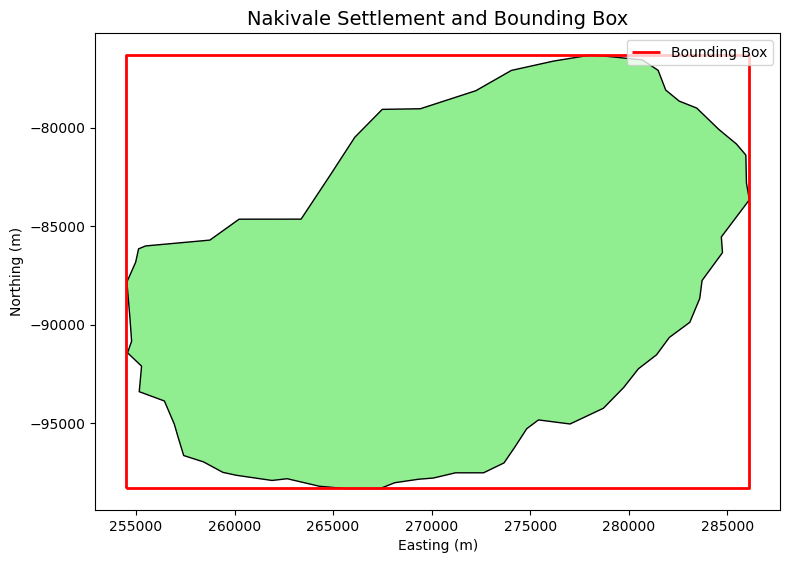

In [52]:
# plot nakivale and its bounding box
fig, ax = plt.subplots(figsize=(8, 8))

# plot the Nakivale polygon(s)
nakivale.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=1, label='Nakivale Settlement')

# Plot the bounding box outline
bbox_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Bounding Box')

# Add labels and styling
ax.set_title("Nakivale Settlement and Bounding Box", fontsize=14)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.legend()

plt.tight_layout()
plt.show()

## Make Grid Polygons

In [93]:
def make_grid_polygons(polygon, resolution, buffer_length = 0):


    # buffer by desired buffer
    polygon_buffered = polygon.buffer(buffer_length)

    #  get bounding box
    minx, miny, maxx, maxy = polygon_buffered.bounds

    # generate grid of bottom left corners
    cols = np.arange(minx, maxx+resolution,resolution)
    rows = np.arange(miny, maxy+resolution, resolution)

    cells = []
    for x in cols:
        for y in rows:
            cell_center = Point(x + resolution/2, y + resolution/2)
            if polygon_buffered.contains(cell_center):
                cell = [
                    (x,y),
                    (x+resolution, y),
                    (x+resolution, y+ resolution),
                    (x, y+resolution)
                ]
                cells.append(Polygon(cell))
    return cells

In [94]:
def make_grid_by_polygon(gdf, resolution, buffer_length = 0):
    if gdf.crs is None:
        raise ValueError("Input GeoDataFrame has no CRS defined. Please set a projected CRS before using this function.")

    # Check for geographic CRS (degrees)
    if gdf.crs.is_geographic:
        raise ValueError(
            f"Input CRS {gdf.crs.to_string()} is geographic (degrees). "
            "Please reproject to a projected CRS (e.g., UTM) before generating hex grids."
        )
    
    all_cells = []
    ids = []

    for idx, row in gdf.iterrows():
        polygon = row.geometry
        cells = make_grid_polygons(polygon, resolution, buffer_length)
        all_cells.extend(cells)
        ids.extend([idx]*len(cells))

    cells_gdf = gpd.GeoDataFrame({'poly_ids': ids, 'geometry': all_cells}, crs = gdf.crs)
    # cells_gdf['oid'] = np.arange(1, len(cells_gdf)+1)
    return cells_gdf


In [97]:
first_attempt = make_grid_by_polygon(nakivale, 2000, 2000)

C:\Users\Zachary\AppData\Local\Temp\ipykernel_25748\2029141669.py:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


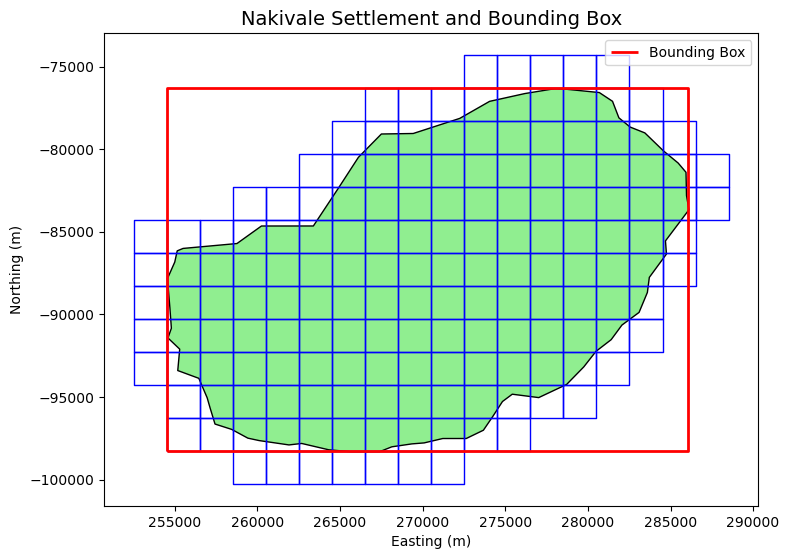

In [98]:
# plot nakivale and its bounding box
fig, ax = plt.subplots(figsize=(8, 8))

# plot the Nakivale polygon(s)
nakivale.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=1, label='Nakivale Settlement')

# Plot the bounding box outline
bbox_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Bounding Box')

# plot the grid cells
first_attempt.plot(ax =ax, color = 'none', edgecolor='blue', linewidth = 1, label = 'Grid Cells' )

# Add labels and styling
ax.set_title("Nakivale Settlement and Bounding Box", fontsize=14)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.legend()

plt.tight_layout()
plt.show()

## Load OSM Dataset